# Zonal Mean Temperature

Calculating the zonal mean of a quantity

In [ ]:
from bokeh.io import output_notebook, show
output_notebook()

In [2]:
from cosima_cookbook import get_nc_variable, expts
from cosima_cookbook import memory

%matplotlib notebook

/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [3]:
@memory.cache
def calc_zonal_mean_temp(expt):
    print('Calculating {} zonal_mean_temp'.format(expt))
    
    if expt == 'mom01v5/KDS75':
        ncfile = 'ocean_month.nc'
    else:
        ncfile = 'ocean.nc'
        
    zonal_temp = get_nc_variable(expt, ncfile, 'temp',
                                 chunks={'st_ocean': None},
                                 n=25)
    
    zonal_mean_temp = zonal_temp.mean('xt_ocean').mean('time')
    zonal_mean_temp.load()
    
    return zonal_mean_temp

In [4]:
def plot_zonal_mean_temp(expt):
    zonal_mean_temp = calc_zonal_mean_temp(expt)
    
    zonal_mean_temp.plot()
    plt.gca().invert_yaxis()
    plt.title('{}: Zonal Mean Temp'.format(expt))

In [5]:
from bokeh.layouts import gridplot


In [6]:
import datashader as ds
import datashader.transfer_functions as tf

In [7]:
df = zonal_mean_temp.to_dataframe(name='temp')
df.reset_index(inplace=True)

NameError: name 'zonal_mean_temp' is not defined

In [ ]:
tf.interpolate(ds.Canvas().points(df,'yt_ocean', 'st_ocean'))

In [22]:
zonal_mean_temp.values.shape

(75, 2700)

<IPython.core.display.Javascript object>


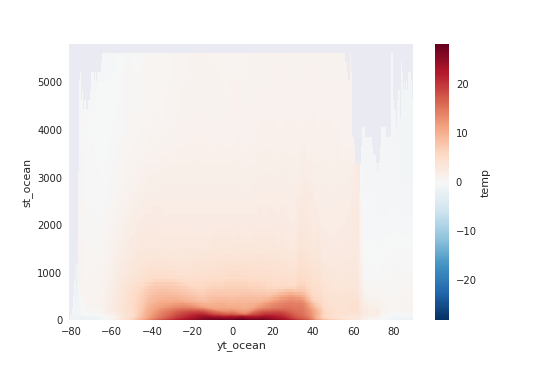

In [30]:

zonal_mean_temp = calc_zonal_mean_temp(expt)
zonal_mean_temp.plot()


ValueError: num must be 1 <= num <= 6, not 7

/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


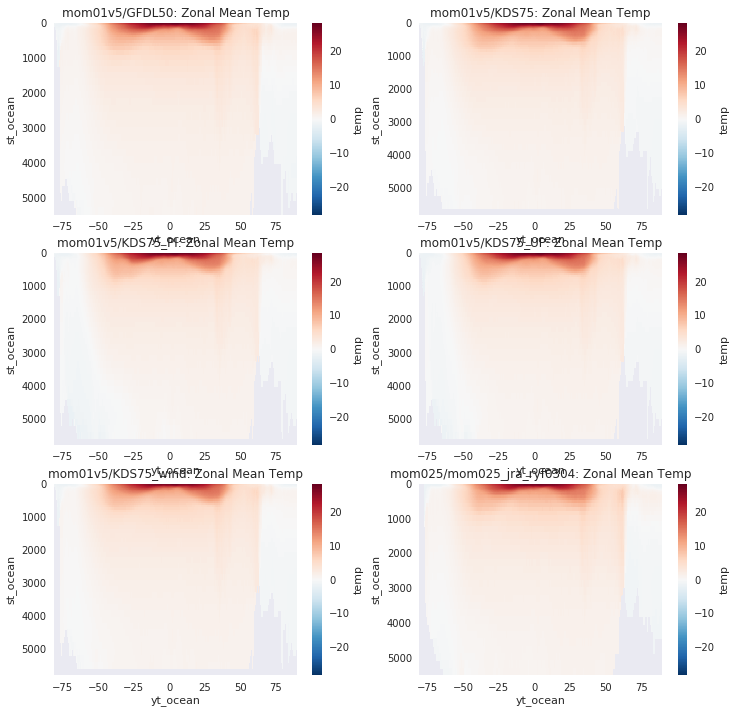

In [13]:
plt.figure(figsize=(12,12)) 
nplot = 0
for expt in expts: 

    nplot += 1
    plt.subplot(3,2,nplot)
    
    plot_zonal_mean_temp(expt)